## Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

matplotlib.rcParams['figure.figsize'] = (15, 10)


In [2]:
from config import get_paths_by_domain

domain = "bible"
paths = get_paths_by_domain(domain)
DATA_CSV_PATH = paths["data_csv_path"]
df = pd.read_csv(DATA_CSV_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner")

df


,book,sentence_path,text
0,1_Chronicles,1:1-1:12,אדם שת אנוש קינן מהללאל ירד חנוך מתושלח למך נח...
1,1_Chronicles,1:11-1:19,את־ענמים ואת־להבים ואת־נפתחים ואת־פתרסים ואת־כ...
2,1_Chronicles,1:18-1:30,שלח ושלח ילד את־עבר ולעבר ילד שני בנים שם האחד...
3,1_Chronicles,1:29-1:37,בכור ישמעאל נביות וקדר ואדבאל ומבשם משמע ודומה...
4,1_Chronicles,1:36-1:43,וגעתם קנז ותמנע ועמלק ס בני רעואל נחת זרח שמה ...
...,...,...,...
4685,Zephaniah,2:15-3:6,העיר העליזה היושבת לבטח האמרה בלבבה אני ואפסי ...
4686,Zephaniah,3:5-3:10,ולא־יודע עול בשת הכרתי גוים נשמו פנותם החרבתי ...
4687,Zephaniah,3:9-3:15,אחד מעבר לנהרי־כוש עתרי בת־פוצי יובלון מנחתי ב...
4688,Zephaniah,3:15-3:20,יהוה משפטיך פנה איבך מלך ישראל יהוה בקרבך לא־ת...


## Analysis

In [3]:
df_by_book["number_of_chars"] = df_by_book['text'].str.len()
df_by_book["number_of_words"] = df_by_book['text'].str.split().map(lambda x: len(x))
df_by_book["avg_word_length"] = df_by_book['text'].str.split().apply(lambda x: [len(i) for i in x]).map(
    lambda x: np.mean(x))


Books with the highest avg word length:

In [4]:
df_by_book.sort_values(by="avg_word_length", ascending=False)[["book", "avg_word_length"]].head(15)


,book,avg_word_length
16,Haggai,4.903915
3,2_Chronicles,4.901277
30,Nehemiah,4.895035
0,1_Chronicles,4.844457
23,Joshua,4.823505
4,2_Kings,4.779331
10,Esther,4.759398
24,Judges,4.729368
19,Jeremiah,4.721927
22,Jonah,4.721286


Text(0.5, 1.0, 'Average word length')

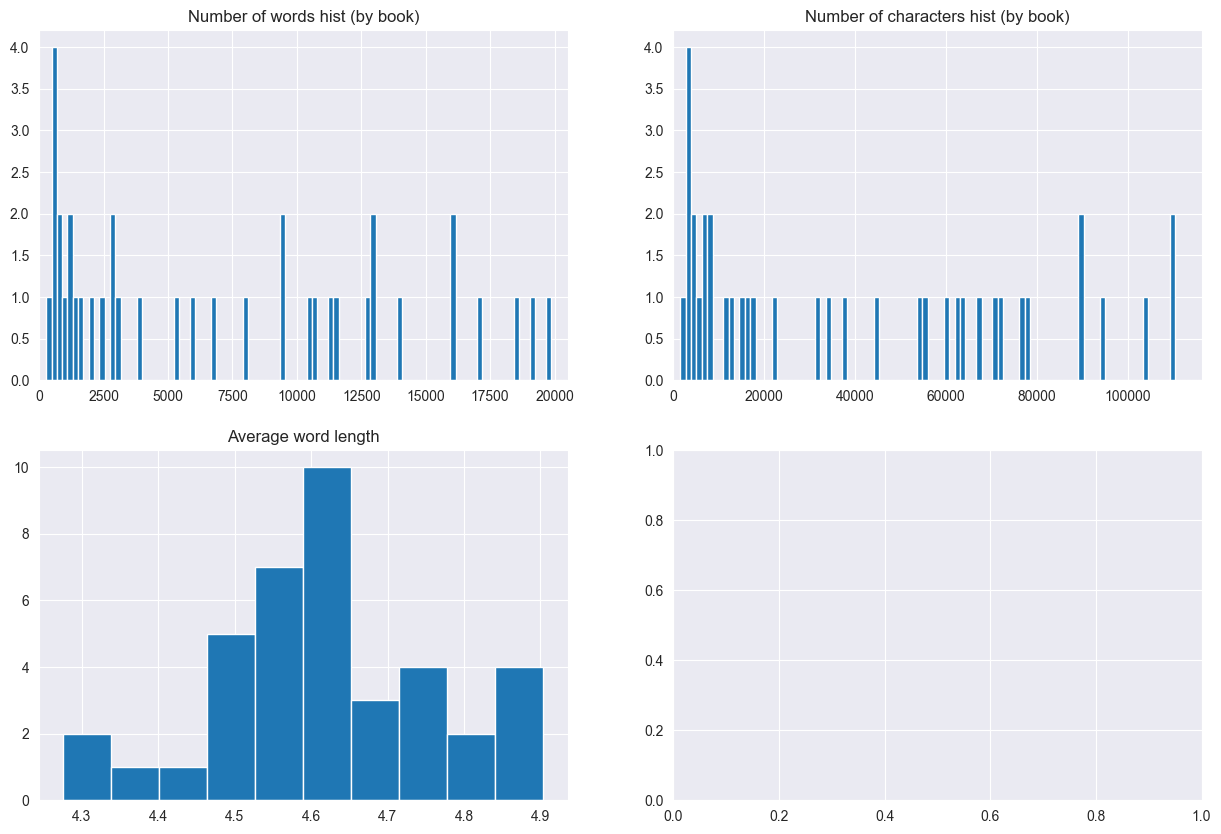

In [6]:
fig, ax = plt.subplots(2, 2)
df_by_book["number_of_words"].hist(ax=ax[0, 0], bins=100)
df_by_book["number_of_chars"].hist(ax=ax[0, 1], bins=100)
ax[0, 0].set_xlim(0, df_by_book["number_of_words"].quantile(0.99))
ax[0, 1].set_xlim(0, df_by_book["number_of_chars"].quantile(0.99))
df_by_book["avg_word_length"].hist(ax=ax[1, 0])
ax[0, 0].set_title("Number of words hist (by book)")
ax[0, 1].set_title("Number of characters hist (by book)")
ax[1, 0].set_title("Average word length")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yonatanlou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Top 20 stop words in corpus')

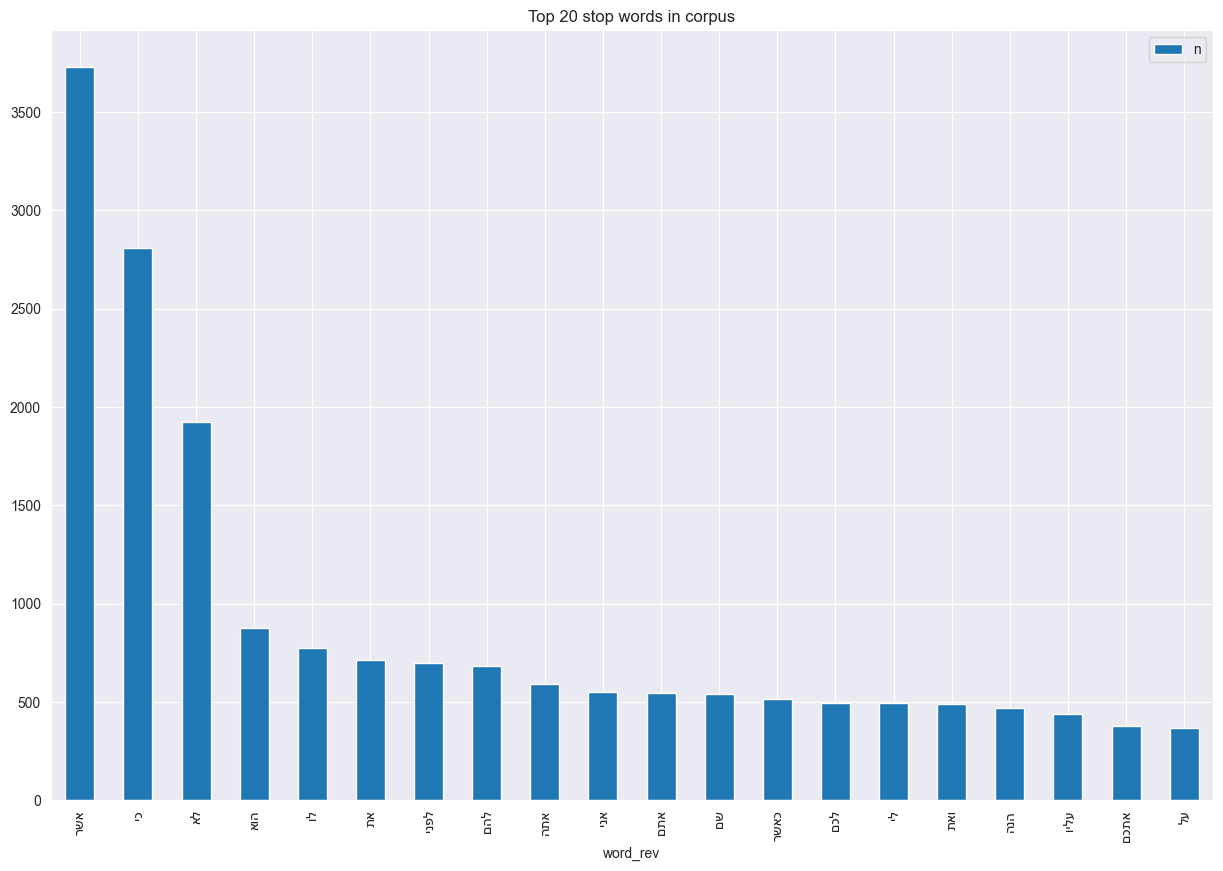

In [7]:
from collections import defaultdict

nltk.download('stopwords')
stop_words = set(stopwords.words('hebrew'))
corpus = []
words = df_by_book["text"].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

dic = defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word] += 1
stop_words_dist = pd.DataFrame([dic]).T.reset_index().rename(columns={0: "n", "index": "word"})
stop_words_dist["word_rev"] = stop_words_dist["word"].str[::-1]
stop_words_dist = stop_words_dist.set_index("word_rev")
stop_words_dist.sort_values(by="n", ascending=False).head(20).plot(kind="bar")
plt.title("Top 20 stop words in corpus")

<Axes: >

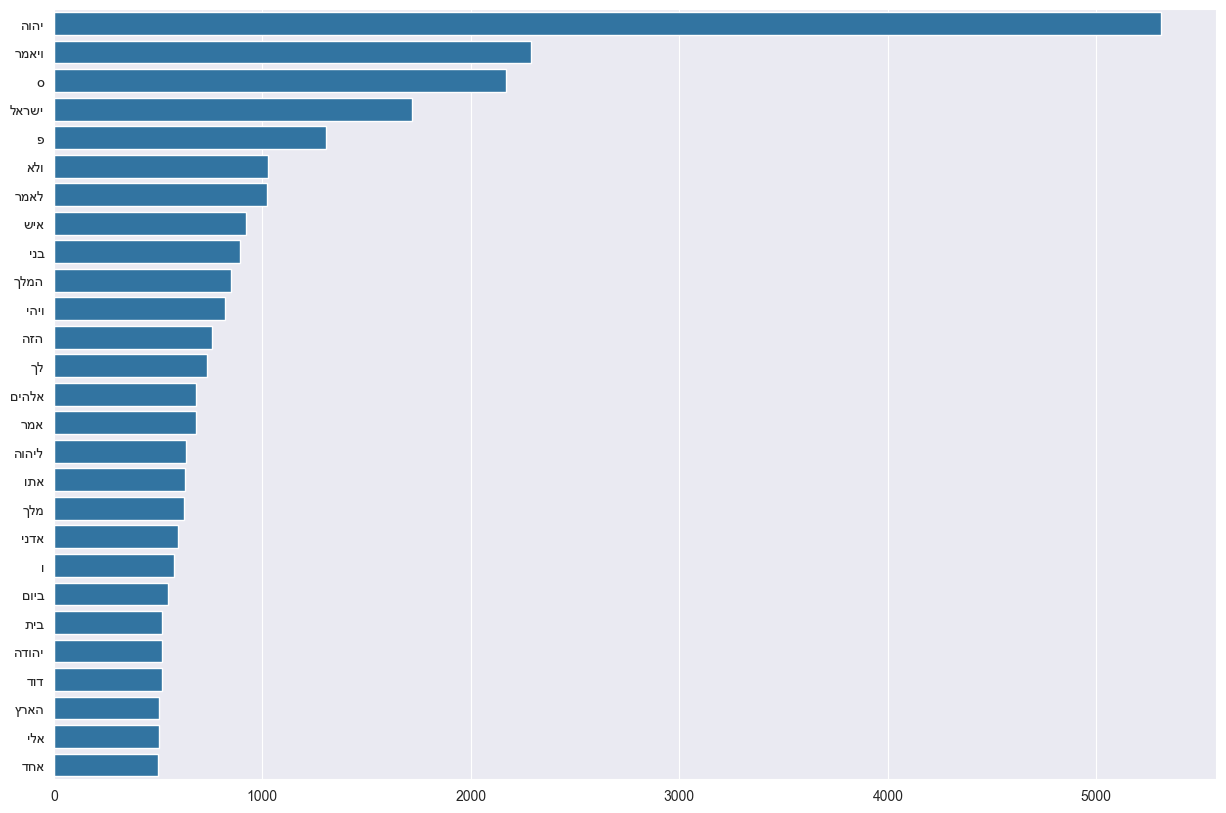

In [8]:
from collections import Counter

corpus = []
words = df_by_book["text"].str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]
corpus_no_punc = [word for word in corpus if word != "."]
corpus_no_letters = [word for word in corpus_no_punc if len(word) != 1]
counter = Counter(corpus_no_punc)
most = counter.most_common()

import seaborn as sns

x, y = [], []
for word, count in most[:40]:
    if (word not in stop_words):
        x.append(word[::-1])
        y.append(count)

sns.barplot(x=y, y=x)

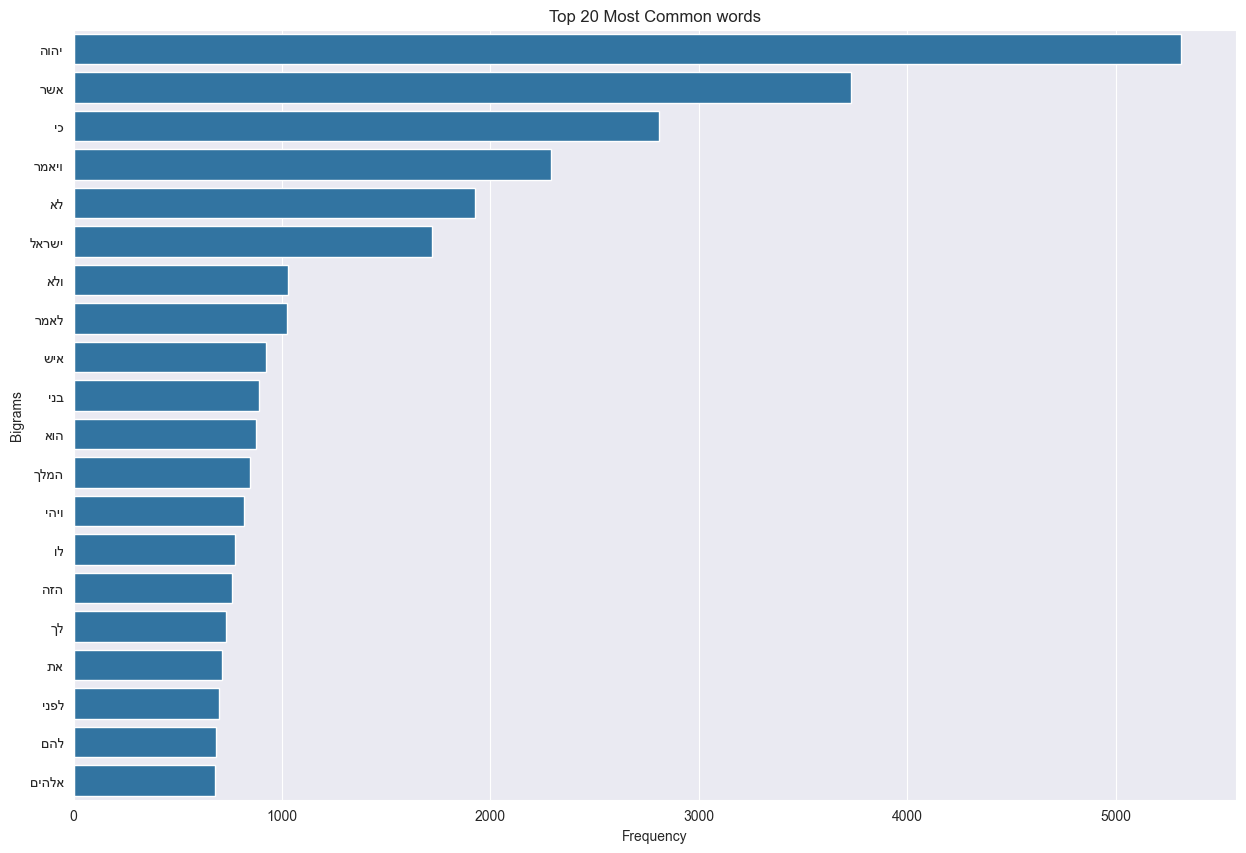

In [9]:
from nltk.util import ngrams
from collections import Counter


def most_common_ngram(words, n=2):
    # Tokenize the corpus into words

    # Generate n-grams
    n_grams = ngrams(words, n)

    # Count and find the most common n-gram
    ngram_freq = Counter(n_grams)
    most_common = ngram_freq.most_common()  # Returns the most common n-gram and its frequency
    return most_common


corpus_no_punc_rev = [word[::-1] for word in corpus_no_letters if word != "."]


def plot_ngram(words, k, n, title=""):
    top_n_bigrams = most_common_ngram(words, k)[:n]
    bigrams, counts = map(list, zip(*top_n_bigrams))
    bigrams = [' '.join(bigram) for bigram in bigrams]  # Convert tuple to string for better readability on plot

    sns.barplot(x=counts, y=bigrams)
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.title(title)
    plt.show()


plot_ngram(corpus_no_punc_rev, 1, 20, 'Top 20 Most Common words')


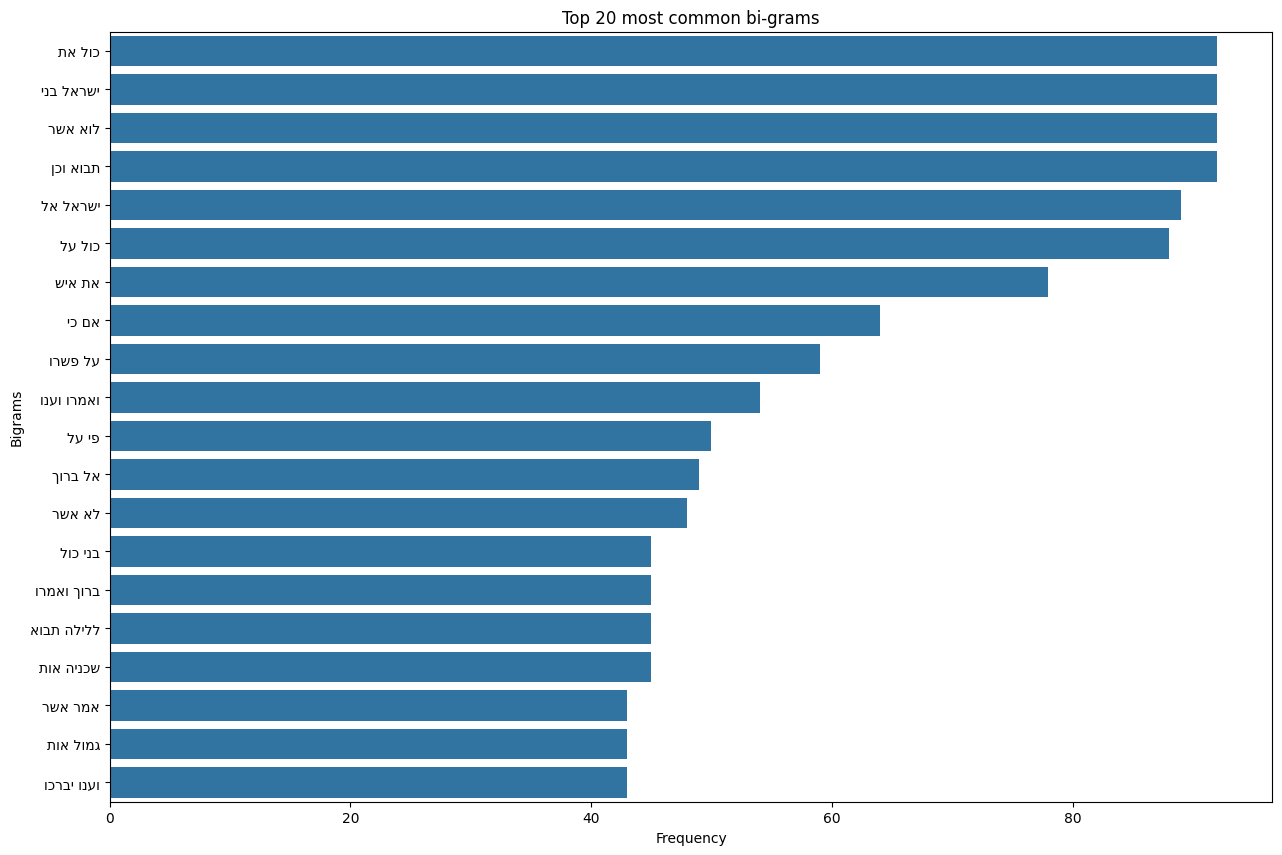

In [29]:
plot_ngram(corpus_no_punc_rev, 2, 20, "Top 20 most common bi-grams")